In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_data.flow_from_directory(r"D:\Assignment3\data set\training",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_data.flow_from_directory(r"D:\Assignment3\data set\testing",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 3453 images belonging to 5 classes.
Found 864 images belonging to 5 classes.


In [5]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [6]:
model=Sequential()

In [7]:
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation='relu'))

In [8]:
model.add(MaxPooling2D(pool_size=(3,3)))

In [9]:
model.add(Flatten())

In [10]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [11]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
model.fit_generator(x_train,steps_per_epoch=108,epochs=30,validation_data=x_test,validation_steps=27)

C:\Users\God\AppData\Local\Temp\ipykernel_1308\1932184935.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=108,epochs=30,validation_data=x_test,validation_steps=27)


Epoch 1/30
108/108 [==============================] - 91s 829ms/step - loss: 1.2978 - accuracy: 0.4498 - val_loss: 1.3923 - val_accuracy: 0.4676
Epoch 2/30
108/108 [==============================] - 85s 787ms/step - loss: 1.0853 - accuracy: 0.5636 - val_loss: 1.2768 - val_accuracy: 0.5162
Epoch 3/30
108/108 [==============================] - 90s 839ms/step - loss: 1.0010 - accuracy: 0.6125 - val_loss: 1.2850 - val_accuracy: 0.5382
Epoch 4/30
108/108 [==============================] - 83s 774ms/step - loss: 0.9780 - accuracy: 0.6108 - val_loss: 1.2401 - val_accuracy: 0.5359
Epoch 5/30
108/108 [==============================] - 58s 534ms/step - loss: 0.9748 - accuracy: 0.6180 - val_loss: 1.2487 - val_accuracy: 0.5625
Epoch 6/30
108/108 [==============================] - 42s 391ms/step - loss: 0.9285 - accuracy: 0.6337 - val_loss: 1.2574 - val_accuracy: 0.5567
Epoch 7/30
108/108 [==============================] - 49s 455ms/step - loss: 0.8854 - accuracy: 0.6617 - val_loss: 1.3697 - val_ac

In [13]:
model.save("flower.h5")

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [15]:
import numpy as np

In [16]:
model=load_model("flower.h5")

In [30]:
img=image.load_img("daisy 1.jpg",target_size=(64,64))

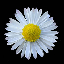

In [31]:
img

In [20]:
type(img)

PIL.Image.Image

In [21]:
x=image.img_to_array(img)

In [22]:
x

array([[[ 33.,  98.,  18.],
        [ 25., 100.,  15.],
        [ 12.,  85.,   3.],
        ...,
        [ 40.,  81.,  15.],
        [ 39.,  78.,  13.],
        [ 25.,  82.,   5.]],

       [[ 35., 101.,  14.],
        [ 28.,  97.,   8.],
        [ 18.,  93.,   2.],
        ...,
        [ 33.,  89.,  16.],
        [ 41.,  82.,  14.],
        [ 30.,  83.,   3.]],

       [[ 26.,  85.,   5.],
        [ 22.,  92.,   6.],
        [ 18.,  91.,   2.],
        ...,
        [ 29.,  94.,  14.],
        [ 29.,  92.,  13.],
        [ 31.,  90.,   6.]],

       ...,

       [[  9.,  39.,   1.],
        [ 12.,  52.,   2.],
        [ 23.,  61.,   2.],
        ...,
        [  5.,  58.,   2.],
        [  4.,  57.,   5.],
        [  7.,  44.,   1.]],

       [[  8.,  38.,   2.],
        [ 15.,  43.,   2.],
        [ 33.,  68.,   2.],
        ...,
        [  7.,  58.,   2.],
        [ 12.,  61.,   5.],
        [  8.,  51.,   6.]],

       [[ 23.,  47.,   0.],
        [ 27.,  49.,   2.],
        [ 22.,  

In [23]:
x.shape

(64, 64, 3)

In [24]:
x=np.expand_dims(x,axis=0)

In [25]:
pred_prob=model.predict(x)

1/1 [==============================] - 1s 1s/step


In [26]:
pred_prob

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [27]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
pred_id=pred_prob.argmax(axis=1)[0]

In [32]:
pred_id

0

In [33]:
print("Predicted flower ",str(class_name[pred_id]))

Predicted flower  Daisy
